In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("04-MPG.csv")
df.head()

,mpg,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,13.067477,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,15.680972,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,13.067477,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,14.700911,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,13.836152,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
#Defining X and Y
#x ba horsepower kar darim
# x = df.iloc[:,4].values.reshape(-1,1)
# y = df.iloc [:,[1]].values

#be 2 halat mishe reshape(-1,1) kard yekish hamin .reshape(-1,1) hast yeki digash inke [] ezafe konim be [:,-1] va beshe [:-[1]]

In [3]:
#dige faghat ba ye variabel kar nadarim ke horse power bood inja mikhaim ba chandta kar dashte bashim
x = df.iloc[:,2:-2].values
y = df.iloc [:,[1]].values

In [4]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)
#chon dige klassifering nis o numerical hast dige stratify nemikhad
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)



In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from sklearn.svm import SVR
model = SVR(kernel="rbf")
model.fit(x_train,y_train)


c:\Users\mrahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Evaluate =====

In [8]:
y_pred = model.predict(x_test)
print(y_pred)

[ 9.21265927  7.8919697  13.43762776 11.0619678  10.69109628  8.37862678
  8.82438236 15.30056529 12.71400696 12.15566674  8.14122863 17.14921725
  7.97920255 13.18012618 10.09821204  6.41997238 14.78090481  9.65035615
  8.02760951 17.80849281 16.30494447  7.28963797 17.05167447 17.91672129
  7.09985711 15.80212773 12.56092879 10.80023353 14.44032282  8.41719368
  7.09216712 17.84860271  8.98501846 16.21166721 15.67795479  9.93876301
  8.97678092  6.49374158 11.33071827  7.32552307  7.99719955 14.19948214
 12.75512573 10.09703743  7.03015115 14.35926115 15.47656029  7.06575725
  8.41029682  9.8702424  14.11304323  9.98600313 11.57048096  9.63010649
  8.4206587  14.35365176  9.45237221  6.7937064  17.62284563  8.72170557
 12.5186245  16.14042777 16.85651115 13.60329893 15.82207229 14.97860281
 10.23674103  7.11814442 13.30067125  9.70395918 18.06119755  9.05881283
  7.093299   10.80772836 11.17219595 11.62393971 14.90867336  8.88638235
 12.17004752 14.77900635  6.84050433 10.44647851 17

In [9]:
print(model.intercept_)
print(model.coef_)

[11.51983888]


AttributeError: coef_ is only available when using a linear kernel

# ==== Evaluation ====

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


In [11]:
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE: {mae}")
mse = mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}")
#rmse
print(f"RMSE: {np.sqrt(mse)}")
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"MAPE: {mape}")
r2 = r2_score(y_test,y_pred)
print(f"r2: {r2}")

MAE: 1.0504854903303669
MSE: 2.2603545647394587
RMSE: 1.5034475596905463
MAPE: 0.08897354401679708
r2: 0.8597934345450193


# ===== Visualisation ======

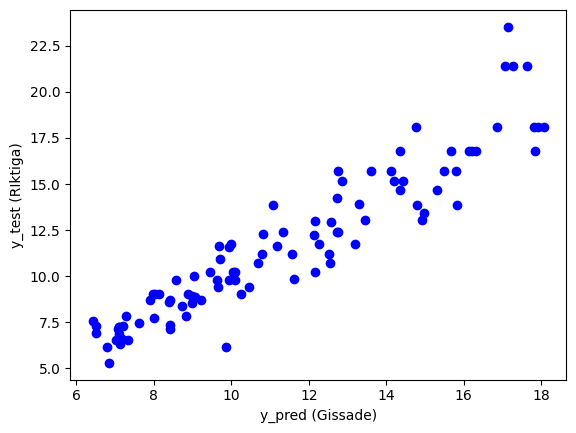

In [13]:
plt.scatter(y_pred,y_test,color="blue")
plt.xlabel("y_pred (Gissade)")
plt.ylabel("y_test (RIktiga)")
plt.show()
#y_pred,y_test mishe tu mehvare ofoghi x biad y_pred vezare tu mehvare amudi y biad y_test bezare

mituni kernel ro bezani "linear" ye kam behtar mishe <br> mituni kernel ro bezani "poly" badtar mishe<br> Yaeni bayad bebini kodum kernel be un dade ha ke mikhay mikhore o javabe behtari mide. shayad BARAYE in dade ha in kernel khub bod shayad bara ye seri dade haye dige ye kernel dige khub bood.<br> Adam bayad test kone una ro